Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.


In [141]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])


In [142]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [143]:
df= pd.read_csv("drug200.csv", delimiter=",")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [144]:
df.shape

(200, 6)

# Data Preprocessing

In [145]:
X= df[["Age","Sex","BP","Cholesterol", "Na_to_K"]].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

### Some features here arent numerical values but using LabelEncoder(), we can convert them into numbers

In [146]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

### Filling the target variable

In [147]:
y=df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Time to split the data in training and testing sets

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train,  y_test= train_test_split(X,y, train_size=0.75, random_state=0)

In [150]:
print("X training set {}".format(X_train.shape))
print("Y training set {}".format(y_train.shape))
print("X testing set {}".format(X_test.shape))
print("Y testing set {}".format(y_test.shape))

X training set (150, 5)
Y training set (150,)
X testing set (50, 5)
Y testing set (50,)


## Here, we set up the Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [152]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Fitting the data

In [153]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Predicting

In [154]:
predTree = drugTree.predict(X_test)

In [155]:
print (predTree [0:5])
print (y_test [0:5])


['drugC' 'drugX' 'drugY' 'drugY' 'drugY']
18     drugC
170    drugX
107    drugY
98     drugY
177    drugY
Name: Drug, dtype: object


## Calculating the Accuracy

In [156]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  1.0


# My model is 100% ACCURATE 

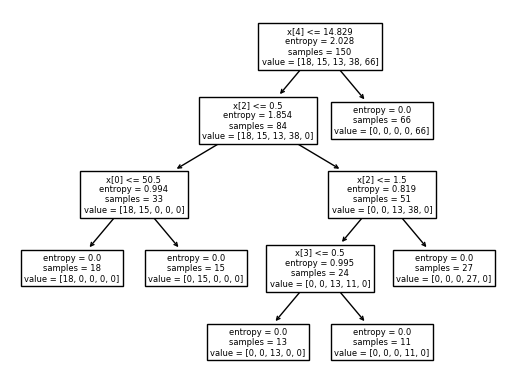

In [157]:
tree.plot_tree(drugTree)
plt.show()